#### 1. How is the student performance affected based one their parents' education level and family size? 
This will explore the correlation between parental education level with the likelihood of students developing alcoholism and see reflect on how this affects students' school performance and develop a predictive model for this dataset. Finding out this correlation and being able to model this connection will help the education and health ministries to work together to take action to reduce the number of students who dropout of school, especially the first generation students who typically have low family educational awareness and larger family sizes. 






In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
s1 = pd.read_csv('student-mat.csv')
s2 = pd.read_csv('student-por.csv')
all_students = pd.concat([s1, s2], axis=0)
all_students.dropna()
all_students.dropna()
all_students['Harmful_Consumption'] = 0

all_students.loc[((all_students['Dalc'] + all_students['Walc'])>= 6), 
       'Harmful_Consumption'] = 1
all_students.to_csv('Data.csv')
all_students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Harmful_Consumption'],
      dtype='object')

In [250]:
#rt = ["famsize", "Pstatus", "studytime","famsup", "Medu", "famrel","Fedu", "Mjob","Fjob", "nursery","studytime", "failures", "goout", "absences", "G1", "G2", "G3" ]
ret = ["famsize", "studytime","famsup", "Medu", "famrel","Fedu", "Dalc", "freetime","goout", "Walc", "absences", "G1", "G2", "G3", "nursery","higher"]
my_dat = all_students.loc[:,ret]


In [260]:
# my_dat["famsize"]

0      GT3
1      GT3
2      LE3
3      GT3
4      GT3
      ... 
644    GT3
645    LE3
646    GT3
647    LE3
648    LE3
Name: famsize, Length: 1044, dtype: object

In [272]:
# "nursery","higher"
dff = my_dat[my_dat["famsize"]=="LE3"]
ne_dt = dff[dff["nursery"]=="no"]
print(ne_dt.shape[0])
dff = my_dat[my_dat["famsize"]=="LE3"]
ne_dt1 = dff[dff["nursery"]=="yes"]
ne_dt1.shape[0]

42


264

In [299]:
# dff = my_dat[my_dat["famsize"]=="LE3"]
# ne_dt = dff[dff["higher"]=="no"]
# nn = ne_dt.shape[0]
# dff = my_dat[my_dat["famsize"]=="LE3"]
# ne_dt1 = dff[dff["higher"]=="yes"]
# nt = ne_dt1.shape[0]
# print("Total number of student from smaller family {}".format(nn+nt))
# print("Percentage of studnet from smaller family and are going to study higher {}".format(nt/(nn+nt)*100))


Total number of student from smaller family 306
Percentage of studnet from smaller family and are going to study higher 91.50326797385621


In [300]:
# dff = my_dat[my_dat["famsize"]=="GT3"]
# ne_dtt = dff[dff["nursery"]=="no"]
# wt = ne_dtt.shape[0]
# dff = my_dat[my_dat["famsize"]=="GT3"]
# ne_dt2 = dff[dff["nursery"]=="yes"]
# ww = ne_dt2.shape[0]
# print("Percentage of studnet from large family and are going to study nursery {}".format(ww/(ww+wt)*100))

Percentage of studnet from large family and are going to study nursery 77.37127371273714


In [302]:
# dff = my_dat[my_dat["famsize"]=="GT3"]
# ne_dtt = dff[dff["higher"]=="no"]
# rt = ne_dtt.shape[0] #.astype(float))
# dff = my_dat[my_dat["famsize"]=="GT3"]
# ne_dt2 = dff[dff["higher"]=="yes"]
# tt= ne_dt2.shape[0]
# print("Total number of studnets who are from large familt {}".format(tt+rt))
# print("The percentage of student from large family who go to higher education is {}".format(tt/(tt+rt)*100))

In [303]:
### From the above stastical analysis we can say that the family size does not have significant impact on studnet field of study. Based on the data almost equal percentage of student from both small and large family size are going to at higher education and smaller percentage of this student are going to study nursery

In [294]:
def famsup_mean(dt):
    my_dat_1 = dt[dt["famsup"]=="no"]
    ft1 = my_dat_1["studytime"].mean()
    print("The mean study time for student without family support {}".format(ft1))
    my_dat_2 = dt[dt["famsup"]=="yes"]
    ft2 = my_dat_2["studytime"].mean()
    print("The mean study time for student with family support {}".format(ft1))
# famsup_mean(my_dat)

In [252]:
# Testing the famsup_mean function
df = my_dat.iloc[1:6, 1:4]
dfd = df[df["famsup"]=="no"]
print("The actual mean {}".format(dfd["studytime"].mean()))

print("The mean from function:")
famsup_mean(dfd)

The actual mean 2.0
The mean from function:
The mean study time for student without family support 2.0
The mean study time for student with family support 2.0


In [253]:
famsup_mean(my_dat)

The mean study time for student without family support 1.8193069306930694
The mean study time for student with family support 1.8193069306930694


In [254]:
def famsz_study_time(dt):
    my_dat_fs1 = dt[dt["famsize"]=="LE3"]
    print("The mean study time for student with less family size {}".format(my_dat_fs1["studytime"].mean()))
    my_dat_fs2 = dt[dt["famsize"]=="GT3"]
    print("The mean study time for student with large family size {}".format(my_dat_fs2["studytime"].mean()))
# famsz_study_time(my_dat)

In [255]:
# Testing famsz_study_time function with smaller dataset 
dff = my_dat.iloc[:10, :5]
dff1 = dff[dff["famsize"]=="LE3"]
print("The testing data mean from function:")
dff2 = dff[dff["famsize"]=="GT3"]
print( "Testing data actual mean is {}".format(dff2["studytime"].mean()))
famsz_study_time(dff)

The testing data mean from function:
Testing data actual mean is 2.1666666666666665
The mean study time for student with less family size 2.0
The mean study time for student with large family size 2.1666666666666665


In [256]:
famsz_study_time(my_dat)

The mean study time for student with less family size 1.9248366013071896
The mean study time for student with large family size 1.989159891598916


In [257]:
my_dat_f1 = my_dat[(my_dat["famsize"]=="LE3") & (my_dat["famsup"]=="no")]
my_dat_f2 = my_dat[(my_dat["famsize"]=="LE3") & (my_dat["famsup"]=="yes")]
my_dat_f3 = my_dat[(my_dat["famsize"]=="GT3")& (my_dat["famsup"]=="yes")]
my_dat_f4 = my_dat[(my_dat["famsize"]=="GT3")& (my_dat["famsup"]=="no")]
st_per = my_dat_f2.shape[0]/(my_dat_f1.shape[0] + my_dat_f2.shape[0])*100
print("Percentage of students with small family size that get family support, {}".format(st_per))
st_per_rt = my_dat_f3.shape[0]/(my_dat_f3.shape[0] + my_dat_f4.shape[0])*100
print("Percentage of students with large family size that get family support, {}".format(st_per_rt))
print("The above percntage shows that family size has some impact on the student"
      "sucess, especially if the students have sibling, they will more likely to study more"
     "This could be there will be enough family member to help the student")



Percentage of students with small family size that get family support, 56.209150326797385
Percentage of students with large family size that get family support, 63.41463414634146
The above percntage shows that family size has some impact on the studentsucess, especially if the students have sibling, they will more likely to study moreThis could be there will be enough family member to help the student


### Modifing the Data for a Better Cisulaization 

In [133]:
# Change all grade score in to one mean grade column
rt = ["famsize", "studytime","famsup", "Medu", "famrel","Fedu", "Dalc", "Walc", "absences", "G1", "G2", "G3"]
my_dat = all_students.loc[:,rt]
ty = ["G1", "G2", "G3"]
new_dt = my_dat[ty]
new_dt.mean(axis = 1)
my_dat["Mean_Grade"] = new_dt.mean(axis=1)
# my_dat

In [134]:
# plt.plot(my_dat["goout"], my_dat["Mean_Grade"])

In [245]:
def hist_func(dt, N_pt, n):
    N_points = 1000
    n_bins = 20
    x = my_dat[my_dat["famsize"]=="LE3"]
    x = x["Mean_Grade"]
    y = my_dat[my_dat["famsize"]=="GT3"]
    y = y["Mean_Grade"]
    fig, axs = plt.subplots(1, 2, sharey=True,figsize = (15, 9), tight_layout=True)
    # We can set the number of bins with the `bins` kwarg
    axs[0].hist(x, bins=n_bins)
    axs[0].set_title("The student from smaller family size Mean_Grade")
    # 
    axs[1].hist(y, bins=n_bins)
    axs[1].set_title("The student from larger family size Mean_Grad")
    axs[0].grid()
    axs[1].grid()

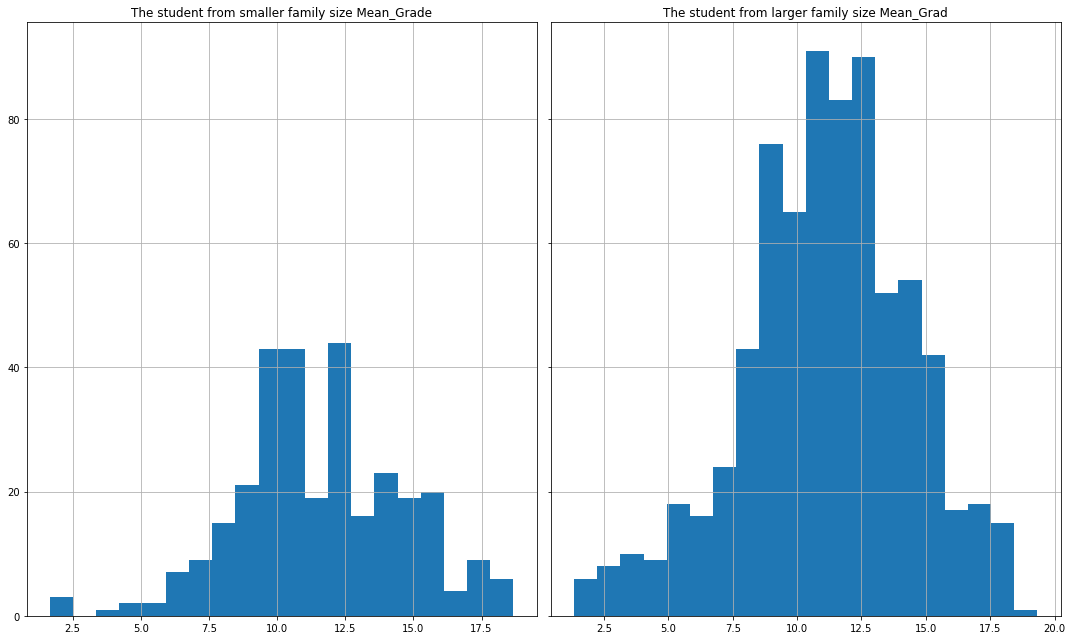

In [246]:
hist_plot_famsize(my_dat, 1000,20)

In [249]:
def scat_plot_func(dt):
    plt.scatter(my_dat["studytime"], my_dat["Mean_Grade"]
    , s=my_dat["G3"])
    plt.xlabel("Study Time")
    plt.ylabel("Mean Grade Score")
    plt.title("The Scatter Plot Study Time vs Mean Grade Score")
    plt.grid()



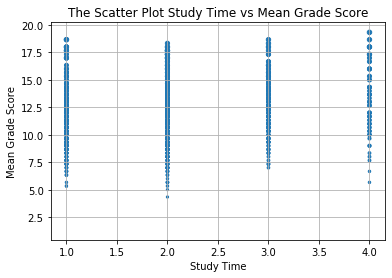

In [146]:
scat_plot_func(my_dat)

In [161]:
def famedu_grad_plt(dt):
    ne_data = dt.drop(["famsize", "famsup"], axis = 1)
    sns.relplot(x = "Fedu", y = "Mean_Grade", data = ne_data, kind = "line")
    plt.title('Father education vs. mean period grade')
    plt.ylabel("mean period grade")
    plt.grid()
    sns.relplot(x = "Medu", y = "Mean_Grade", data = ne_data, kind = "line")
    plt.title('Mother education vs. second period grade')
    plt.grid()

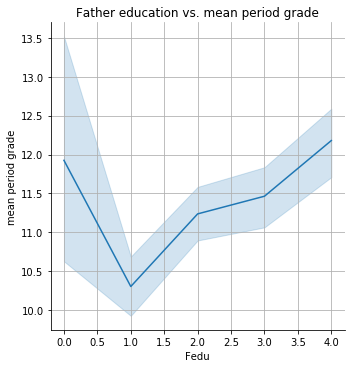

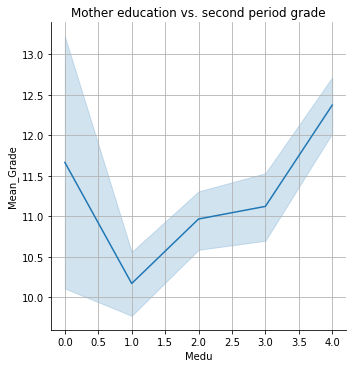

In [162]:
famedu_grad_plt(my_dat)

### Reduce the smaller datasets such There are only 17 student2 who are from family with zero education

In [163]:
def modified_plot(dt):
    ne_data = dt.drop(["famsize", "famsup"], axis = 1)
    new_data = ne_data[(ne_data["Fedu"]!=0) & (ne_data["Medu"]!=0)]
    sns.relplot(x = "Fedu", y = "Mean_Grade", data = new_data, kind = "line")
    plt.title('Father education vs. mean period grade')
    plt.ylabel("mean period grade")
    plt.grid()
    sns.relplot(x = "Medu", y = "Mean_Grade", data = new_data, kind = "line")
    plt.title('Mother education vs. second period grade')
    plt.grid()

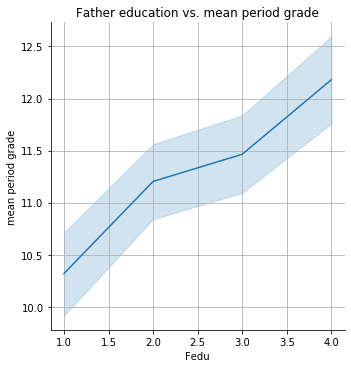

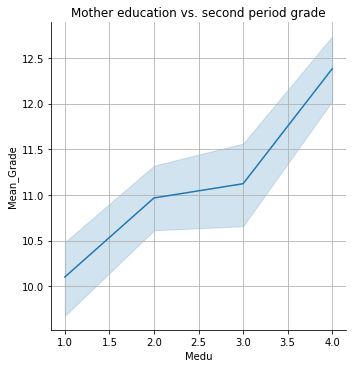

In [164]:
modified_plot(my_dat)

#### The above scatter plot shows that there are very small number of student whose parent never went to school. The grade score has directly related to the father level of education.

## Alcohol Consumption and Family educations level

In [166]:
# Line plot parents educationlevel and students alcohol consumption
def lin_plt_famedu_alc(dt):
    ne_data = my_dat.drop(["famsize", "famsup"], axis = 1)
    sns.relplot(x = "Fedu", y = "Dalc",data =ne_data, kind = "line")
    plt.title("Father education vs Weekday alcohol consumption of students")
    plt.grid()
    sns.relplot(x = "Medu", y = "Dalc",data =ne_data, kind = "line")
    plt.title("Mother education vs Weekday alcohol consumption of students")
    plt.grid()
    sns.relplot(x = "Fedu", y = "Walc",data =ne_data, kind = "line")
    plt.title("Father education vs Weekend alcohol consumption of students")
    plt.grid()
    sns.relplot(x = "Medu", y = "Walc",data =ne_data, kind = "line")
    plt.title("Mother education vs Weekend alcohol consumption of students")
    plt.grid()

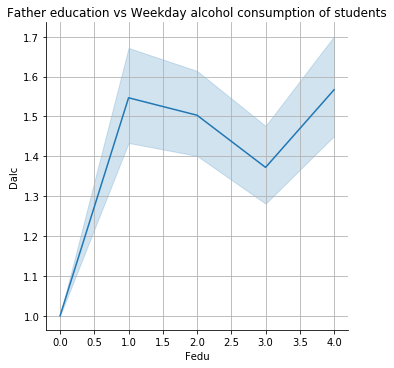

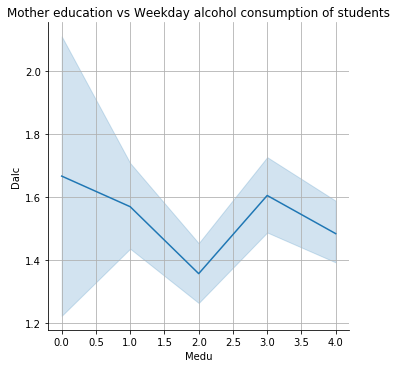

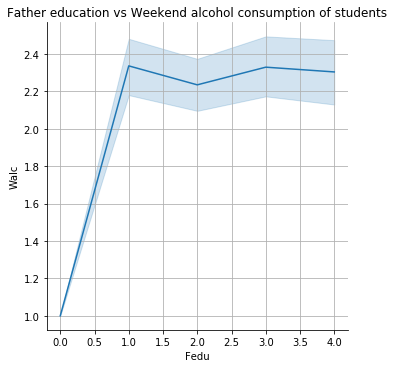

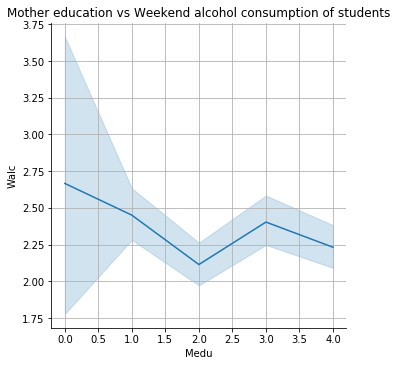

In [167]:
lin_plt_famedu_alc(my_dat)

#### The above plot shows that Mother education level and students acohol consumption have inversly related. Where as, Father education level and student alcohol consumption have directly related. This data makes sense becasue when male are rich or have enough income they more likely to be social and hang out with friend while they having some drinks.   In conclusion, as father education level increased, the student alcohol consumption increased . On the contrary students from mother who has higher education tend to have less alcohol consumption.

In [168]:
def alc_absc_pl(dt):
    sns.relplot(x = "Dalc", y = "absences",data =ne_data, kind = "line")
    plt.title("Weekend Alcohol consumption vs Absence of the students")
    plt.grid()
    sns.relplot(x = "Walc", y = "absences",data =ne_data, kind = "line")
    plt.title("Weekeday Alcohol consumption vs Absence of the student")
    plt.grid()

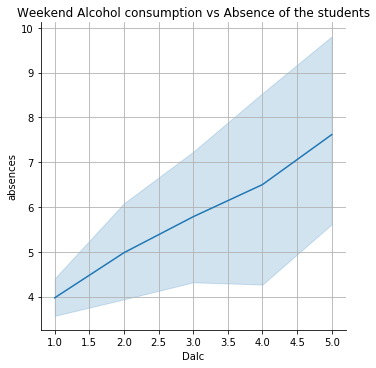

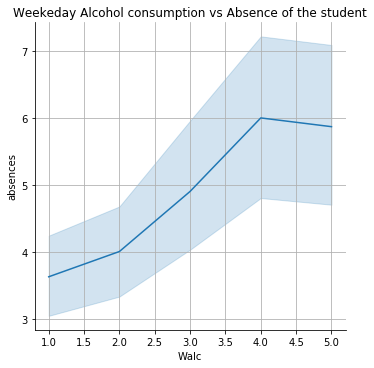

In [169]:
alc_absc_pl(my_dat)

#### The above plots show that the amount of alcohol consumption highly relted to the student absences.

# Machine Learning Analysis

In [105]:
from sklearn import linear_model, metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
ml_data = my_dat.drop(["G1", "G2", "G3"], axis=1)
# ml_data

In [106]:
X = ml_data.loc[:, ml_data.columns != 'Mean_Grade']
X = pd.get_dummies(X)
y = np.round(ml_data['Mean_Grade'])
  
# splitting X and y into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=1) 
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
y_pred = reg.predict(X_test)

# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
y_train_pred = reg.predict(X_train)  # generate the predict y values
y_test_pred = reg.predict(X_test)  # generate the test y values
print('Train MSE:', mean_squared_error(y_train, y_train_pred))
# Prinf the mean squore error for taining data
print('Test MSE:', mean_squared_error(y_test, y_pred))
# wt = accuracy_score(y_test, y_pred)
# print("The  Accuracy of LinearRegression {}".format(wt)) 


Coefficients: 
 [ 0.53465921  0.50075718  0.06094024  0.33469223 -0.42939245 -0.04513155
 -0.04342436 -0.35699213  0.35699213  0.25193023 -0.25193023]
Variance score: 0.08641800987390214
Train MSE: 9.294955673114938
Test MSE: 9.309789704925475


## Reproducing your results

#### 1. We discuss and searching for an intersting and impactiful ideas.  2. We used Kaggle to find the different past reseach with a better datasets. 3. We generate question we would like to answer based on the dataset. 4. We download and cleaned the dataset using Python 3.7. 5. The commands we used and sns.relplot to visualized the data in line plot. The sklearn machine learning packages to develop a model for the data set


In [84]:
# X = pd.get_dummies(X)  # assign the dummy variable for x componenets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# # split the data to train and test with 80 to 20
# model = DecisionTreeClassifier()  # set up the model
# model.fit(X_train, y_train)  # run train the model
# accuracy_score(y_train, model.predict(X_train))
# # finding the accurace train data

# # find the accuracy for test dat
# y_train_pred = model.predict(X_train)  # generate the predict y values
# y_test_pred = model.predict(X_test)  # generate the test y values
# print('Train MSE:', mean_squared_error(y_train, y_train_pred))
# ac  = accuracy_score(y_test, model.predict(X_test))
# # Prinf the mean squore error for taining data
# print('Test MSE:', mean_squared_error(y_test, y_test_pred))
# # print the mean square erore for the test data
# print("The Accuracy of DecisionTreeClassifier {}".format(ac)) 

